# Data Science Project: Predicting Player Gender on a Minecraft Server

#### Group Project 003-13

## 1) Introduction

This project aims to explore whether the amount of time players spend on a Minecraft research server can be used to predict their gender. The dataset was collected by a UBC computer science research team to study player engagement patterns and demographic differences.  

Understanding how playtime relates to gender can provide insights into how different groups interact with online environments. It may also help researchers design more inclusive and engaging experiences for all players.


## 2) Data Description

### Datasets

#### `players.csv`

**Number of Observations:** 196  
**Number of Variables:** 7  

**Variables:**
- `experience`: Player’s experience level (e.g. Pro, Amateur, Veteran)
- `subscribe`: Subscription status (TRUE/FALSE)
- `hashedEmail`: Hashed version of player email (used to link with sessions.csv)
- `played_hours`: Total hours spent playing
- `name`: Player name
- `gender`: Player’s gender
- `age`: Player’s age

#### `sessions.csv`

**Number of Observations:** 1535  
**Number of Variables:** 5  
**Variables:**
- `hashedEmail`: Player ID for session tracking  
- `start_time`: Session start time  
- `end_time`: Session end time  
- `original_start_time`: Numeric timestamp for start time  
- `original_end_time`: Numeric timestamp for end time  

### Potential Issues

- **Missing Values:** Some players may have missing `age` or `played_hours`.  
- **Data Privacy:** The email addresses are hashed for anonymity.  
- **Sampling Bias:** The dataset may not represent all Minecraft players.  

### Potential Confounding Variables

- Experience Level: Players with higher experience levels may play longer hours regardless of gender, which could confound the relationship between gender and playtime.  
- Subscription Status: Subscribed players might spend more time playing due to increased engagement, and subscription rates could differ between genders.  
- Age: Age may influence both the amount of time spent playing and gender distribution patterns.  
- Organization Affiliation: Players associated with organizations might show different engagement levels, and these organizations could have gender imbalances.

## 3) Research Question

### Broad Question

How do player behaviors and activity levels relate to their gender?

### Specific Question
Can total hours played (`played_hours`) predict a player’s gender (`gender`)?

#### **Response Variable:**  
- `gender` (categorical — male or female or others)

#### **Explanatory Variable:**  
- `played_hours` (quantitative — total time spent playing)

### Data Wrangling Plan

1. **Import and inspect the datasets** (`players.csv`, `sessions.csv`).  
2. **Filter gender:** Keep only "Male" and "Female" players for the analysis.  
3. **Select relevant variables:** `gender` and `played_hours`.  
4. **Encode `gender` as a factor** with two levels: "Male" and "Female".  
5. **Handle missing values:** Remove or impute missing `played_hours` or `gender` entries.  
6. **Standardize numeric variables:** Scale `played_hours` so KNN distance calculations are correct.  
7. **Split data** into training and testing sets for predictive modeling.

### Predictive Method
- Will use **K-Nearest Neighbors (KNN)** as the primary method for this binary classification problem, predicting a player’s gender based on the total hours they have played on the Minecraft server.

## 4) Exploratory Data Analysis (EDA)

### Data Wrangling

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(repr)

In [3]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [4]:
players <- read_csv("https://raw.githubusercontent.com/KEN-I-NOT/DSCI_project_group13/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/KEN-I-NOT/DSCI_project_group13/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(players, 5)
head(sessions, 5)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.72e+12,1.72e+12


The dataset players is tidy, as each variable forms its own column, each observation forms its own row, each value forms its own cell. 

The dataset sessions is mostly tidy with a minor issue of duplicated time variables, but since we are not using it for the project, we will not wrangle it. 

In [6]:
players_filtered <- players[c("gender", "played_hours")]

players_filtered$gender <- recode(players_filtered$gender,
                                  "Male" = "Male",
                                  "Female" = "Female",
                                  .default = "Others")

players_filtered$gender <- factor(players_filtered$gender, levels = c("Male", "Female", "Others"))

table(players_filtered$gender)


  Male Female Others 
   124     37     35 

In [7]:
mean_played_hours <- mean(players$played_hours, na.rm = TRUE)
mean_played_hours

[1] 5.845918

In [8]:
mean_age <- mean(players$Age, na.rm = TRUE)
mean_age

[1] 21.13918

### Mean Value for Each Quantitative Variable in the players.csv Data Set
| Variable       | Mean Value |
|----------------|-----------|
| played_hours   | 5.85      |
| age            | 21.14     |


---

### Exploratory Visualizations

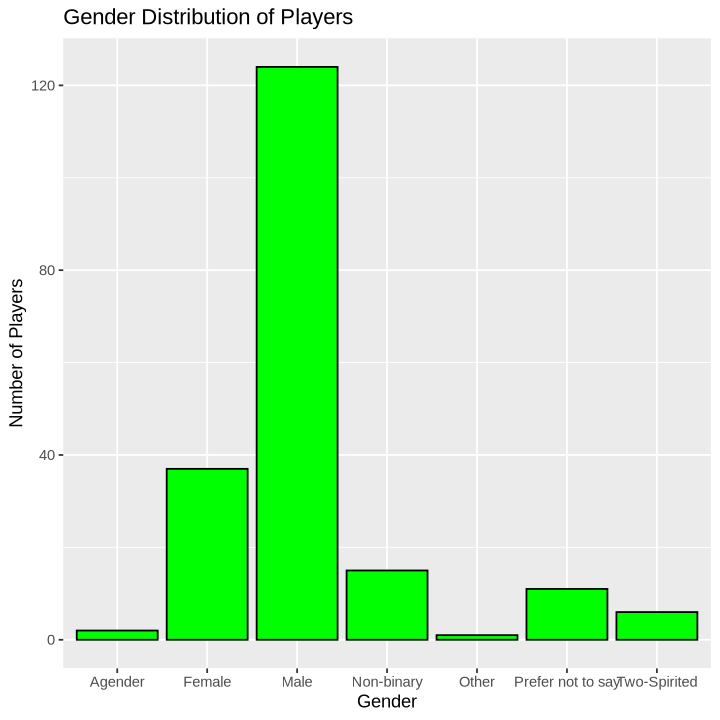

In [32]:
# graph of Gender Distribution (
graph_gender_1_plot <- ggplot(players, aes(x = gender)) +
  geom_bar(fill = "green", color = "black") +
  labs(title = "Gender Distribution of Players", x = "Gender", y = "Number of Players") 
graph_gender_1_plot

Male players make up the largest group, with over 120 participants. Female players form the second-largest group, followed by Non-binary and Prefer not to say categories. Very few players identified as Agender, Other, or Two-Spirited, indicating that male players are the dominant demographic in this dataset.

For the purpose of our research, we make it male, female, and others.

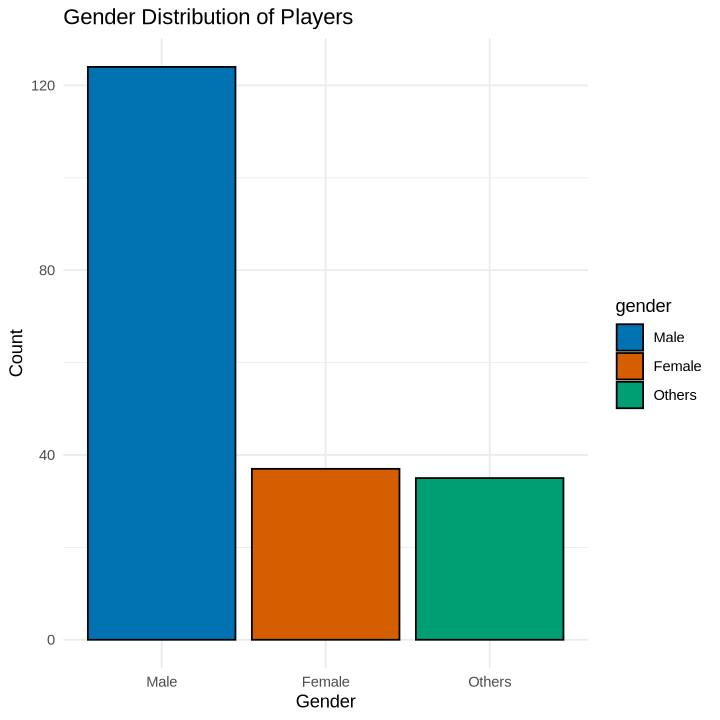

In [33]:
gender_dist_2_plot <- ggplot(players_filtered, aes(x = gender, fill = gender)) +
  geom_bar(color = "black") +
  scale_fill_manual(values = c("Male" = "#0072B2",   
                               "Female" = "#D55E00", 
                               "Others" = "#009E73")) + 
  labs(title = "Gender Distribution of Players",
       x = "Gender",
       y = "Count") +
  theme_minimal()

gender_dist_2_plot

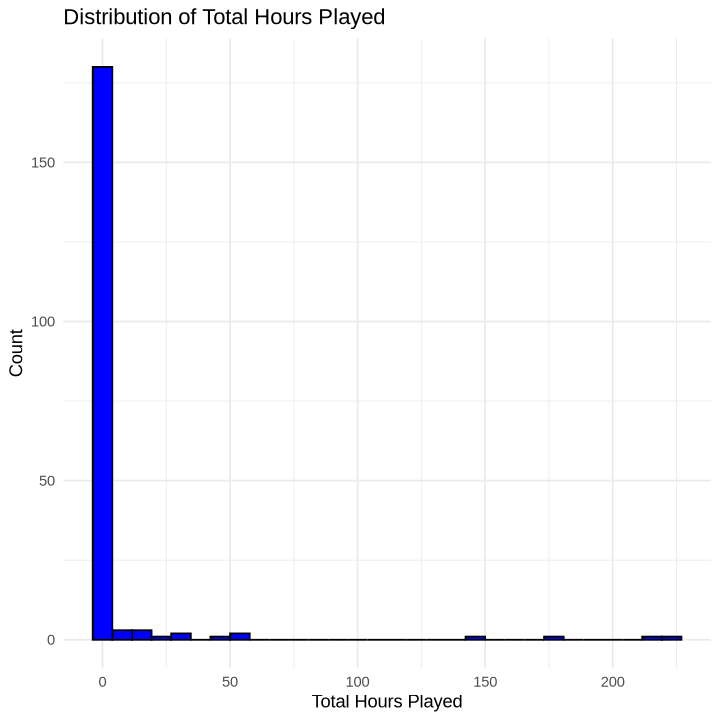

In [34]:
play_hours_3_plot <- ggplot(players_filtered, aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Distribution of Total Hours Played",
       x = "Total Hours Played",
       y = "Count") +
  theme_minimal()
play_hours_3_plot

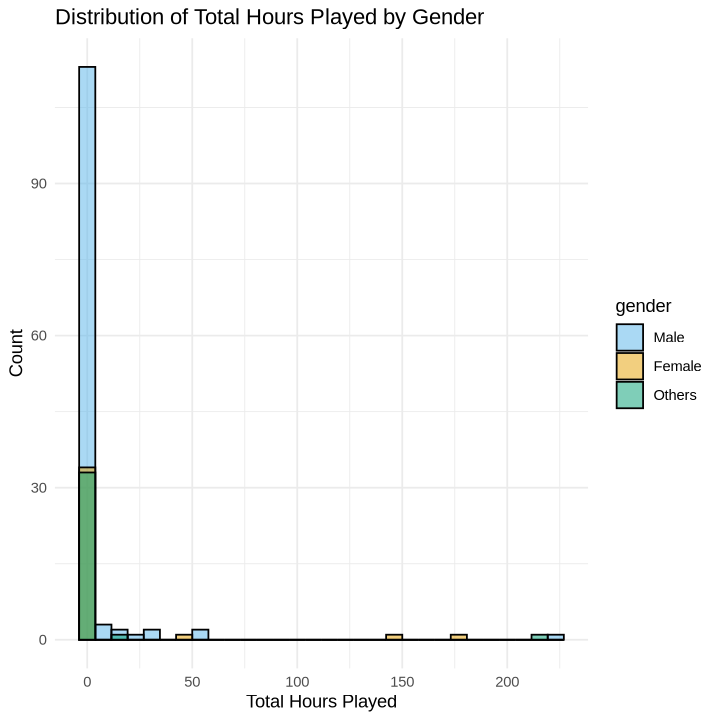

In [35]:
options(repr.plot.width = 6, repr.plot.height = 6)

played_hours_hist_4_plot <- ggplot(players_filtered, aes(x = played_hours, fill = gender)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30, color = "black") +
  scale_fill_manual(values = c("Male" = "#56B4E9", "Female" = "#E69F00", "Others" = "#009E73")) +
  labs(title = "Distribution of Total Hours Played by Gender",
       x = "Total Hours Played",
       y = "Count") +
  theme_minimal()

played_hours_hist_4_plot

### Insights from the Plots
- Gender Distribution: There are roughly three times more male players than female players and other genders players in the dataset, indicating a strong imbalance in gender representation. This could influence how predictive models interpret gender-related patterns.
- Played Hours Distribution: The majority of players have logged between 0–3 hours. Very few players have played more than 50 hours, showing that most players are low-engagement users.
- Played Hours by Gender: Most players, both male and female and others, remain in the 0–3 hours range. Interestingly, there are a few female players with exceptionally high play hours above 125, though the single highest playtime is among male players. This suggests that while most female players play less, there are some highly active female users. Overall, the data is heavily right-skewed, which may affect model predictions and requires careful consideration when using KNN classification.

### other interesting phenomena on the data set players.csv that may or may not be useful

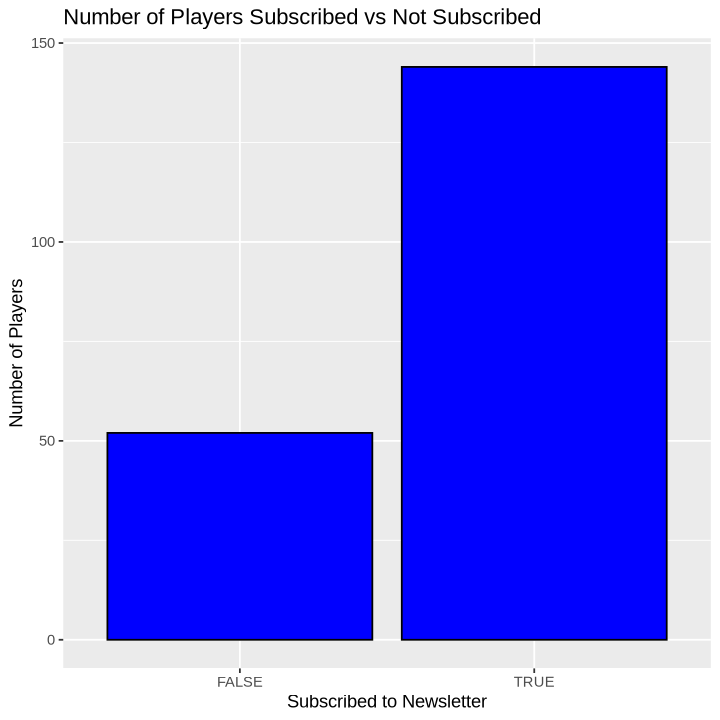

In [36]:
# graph of Subscribed vs Not Subscribed
graph_subscribe_5_plot <- ggplot(players, aes(x = subscribe)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Number of Players Subscribed vs Not Subscribed", x = "Subscribed to Newsletter", y = "Number of Players") 
graph_subscribe_5_plot

The number of players who subscribed is about three times the number of players who did not subscribe.

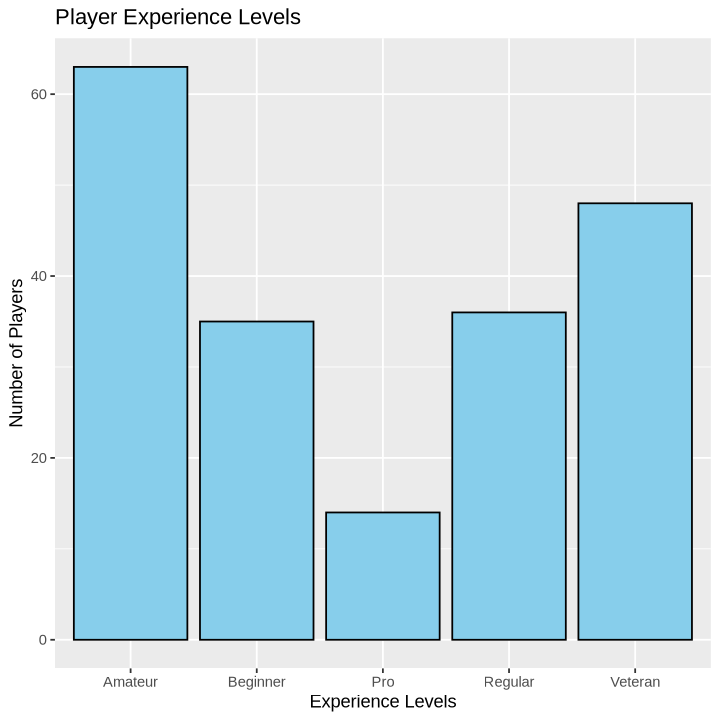

In [37]:
# graph of experience levels 
graph_experience_6_plot <- ggplot(players, aes(x = experience)) +
  geom_bar(position = "dodge", fill = "skyblue", color = "black") +
  labs(title = "Player Experience Levels", x = "Experience Levels", y = "Number of Players")
graph_experience_6_plot

Most players are Amateurs, followed by Veterans, while Beginners and Regular players appear in moderate numbers. The Pro group has the fewest participants, indicating that highly experienced players are less common on the server.

----

## 5) Method and Plan

**Chosen Method: KNN Classification**

Select K-Nearest Neighbors (KNN) for predicting a player's gender based on their total hours played. KNN is simple, interpretable, and well-suited for binary classification tasks where the relationship between a numeric explanatory variable (played_hours) and a categorical response variable (gender) can be captured by proximity. It does not require assumptions about the data distribution, making it flexible for dataset.

**Why This Method?**

KNN is ideal for this problem because:  

- It handles non-linear relationships effectively.  
- It uses distance-based similarity, which fits the data where players with similar total hours may share the same gender.  

**Assumptions**

- Players with similar playtime patterns are likely to have the same gender.  
- The data is not excessively sparse or high-dimensional.  

**Limitations**

KNN has some drawbacks:  

- Sensitive to outliers: extreme playtime values may distort distance calculations.  
- Choice of K: a small K can overfit, and a large K can underfit. We will tune K through cross-validation.  

**Model Comparison**

Will use cross-validation to compare different values of K and evaluate models based on accuracy, precision, recall, and F1 score. The optimal K will be selected based on maximizing predictive performance.

**We Do Not Use Linear Regression**  

1) The question we are exploring is not a linear relationship between features and the target.  
2) Binary regression methods could be considered, but we have not learned them in DSCI100.  

**Data Processing**

- **Train-Test Split:** 80% training, 20% testing. Note the split will be done before model fitting to avoid data leakage.
- **Cross-Validation:** 5-folds cross-validation to tune K.  
- **Scaling:** Standardize `played_hours` before training to improve KNN performance.  
- **Validation Set:** Final model performance will be tested on the hold-out test set.


After we answer our research question, we will also critically analyze what happened: why things worked, or why they didn't.

We will also come up with suggestions for next steps.

## 6) Modeling

Recall Our Research Question: Can total hours played (`played_hours`) predict a player’s gender (`gender`)?

In [15]:
library(dplyr)

In [16]:
library(stats)

Consider our current filtered data set players_filtered, it includes Male, Female, and Others.

In [17]:
tail(players_filtered, 5)

gender,played_hours
<fct>,<dbl>
Female,0.0
Male,0.3
Others,0.0
Male,2.3
Others,0.2


Since “Others” is a collection of multiple self-identified genders, including it and predicting whether the gender of a player is “Male, Female, or Others” would lead to uninterpretable results and poor predictions, we exclude “Others” and keep only “Male” and “Female” players for the purpose of this analysis.

That is to say, we are testing whether (`played_hours`) can predict a player’s gender, given that the person self-identified as male or female.

In [18]:
players_filtered_for_model <- filter(players_filtered, gender != "Others")
set.seed(9999)
slice_sample(players_filtered_for_model, n = 5)

gender,played_hours
<fct>,<dbl>
Female,0.0
Female,0.0
Male,0.0
Male,0.1
Female,0.0


## Note set.seed to make the results replicable.

Now we split data into training and testing sets for predictive modeling.

In [19]:
players_split <- initial_split(players_filtered_for_model, prop = 0.8, strata = gender)
players_train <- training(players_split)
players_test <- testing(players_split)

Next we create the recipe and standardize numeric variables; scale `played_hours` so KNN distance calculations are correct.  

In [20]:
players_recipe <- recipe(gender ~ ., data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Then we build a K-Nearest Neighbors (KNN) classification model in the tidymodels framework. It sets up a KNN model where the number of neighbors (K) will be tuned during training, uses rectangular (uniform) weighting for neighbors.

In [21]:
players_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

Here we create a 5-fold cross-validation setup for the training data (players_train). By using vfold_cv() with v = 5, the training set is split into 5 folds for repeated model evaluation, and strata = gender ensures that each fold keeps the same proportion of gender categories. This helps produce more reliable and balanced model performance estimates.

In [22]:
players_vfold <- vfold_cv(players_train, v = 5, strata = gender)

We need to consider the total number of males + females in the data set to choose a reasonable K range.

In [23]:
nrow(players_filtered_for_model)

[1] 161

There is a total of 161 players in the data set, so 1 to 30 would be a reasonable range for K.

Next we build a tibble named k_vals containing a column called neighbors with values ranging from 1 to 30 in steps of 1. It provides a sequence of possible K values that the model will test in order to find the best-performing number of neighbors.

In [24]:
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

Now we form and tune a KNN classification model using the tidymodels workflow. It starts by creating a workflow, adding a preprocessing recipe (players_recipe) and the KNN model specification (players_spec). It then performs grid tuning with 5-fold cross-validation (players_vfold) over the set of k values in k_vals, collecting all performance metrics. Finally, it filters the results to keep only accuracy scores, storing them in accuracies.

In [25]:
knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()
accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

→ A | warning: ✖ No observations were detected in `truth` for level: Others.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x5

There were issues with some computations   A: x5





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.3903846,5,0.042958284,Preprocessor1_Model01
2,accuracy,multiclass,0.3980769,5,0.049740451,Preprocessor1_Model02
3,accuracy,multiclass,0.5788462,5,0.025147494,Preprocessor1_Model03
4,accuracy,multiclass,0.5942308,5,0.029228239,Preprocessor1_Model04
5,accuracy,multiclass,0.5942308,5,0.029228239,Preprocessor1_Model05
6,accuracy,multiclass,0.6019231,5,0.026437937,Preprocessor1_Model06
7,accuracy,multiclass,0.5557692,5,0.029854182,Preprocessor1_Model07
8,accuracy,multiclass,0.5467949,5,0.025472201,Preprocessor1_Model08
9,accuracy,multiclass,0.5467949,5,0.025472201,Preprocessor1_Model09


We make a plot that shows how model accuracy changes with different values of K (number of neighbors). The final line displays the plot, allowing us to visually identify which K values give the best accuracy.

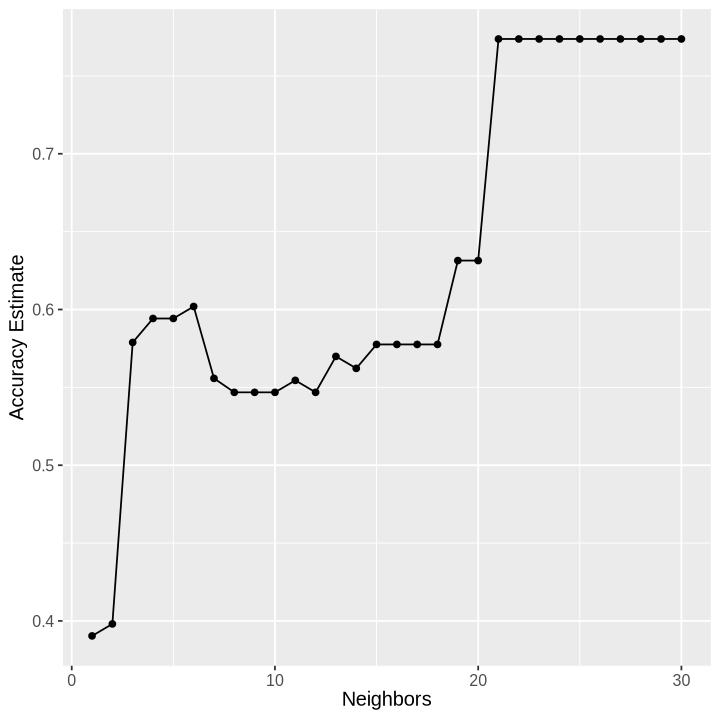

In [38]:
accuracies_vs_k_7_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracies_vs_k_7_plot

(identifies the best-performing number of neighbors (K) for the model)

In [27]:
best_k <- accuracies |>
  arrange(desc(mean)) |>
  head(1) |>
  pull(neighbors)

best_k

[1] 21

Then, we rebuild the KNN model using the best k value found (K = 21), and create a workflow and fit the final KNN classification model to the full training data.

In [28]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

Finally, we generate predictions from the final KNN model (knn_fit) using the test set (players_test) and appends those predictions to the original test data. We calculate performance by comparing the predicted classes (.pred_class) with the true gender labels. The final metrics output shows how accurately the model performed on unseen data.

In [29]:
predictions <- predict(knn_fit, players_test) |> 
  bind_cols(players_test)

predictions

metrics <- predictions |> 
  metrics(truth = gender, estimate = .pred_class) |> 
  filter(.metric == "accuracy")

metrics

.pred_class,gender,played_hours
<fct>,<fct>,<dbl>
Male,Male,30.3
Female,Male,0.0
Male,Male,0.2
Female,Male,0.0
Male,Male,5.6
Male,Male,0.9
Male,Male,0.2
Female,Male,0.0
Male,Male,1.0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5151515


The model achieved an accuracy of about 51.5%, meaning it correctly predicted the gender for roughly half of the test cases.

Consider this confusion matrix to find the precisions, recalls, and F1 scores.

In [30]:
predictions$gender <- droplevels(predictions$gender)
predictions$.pred_class <- droplevels(predictions$.pred_class)

players_conf_mat <- predictions |> 
  conf_mat(truth = gender, estimate = .pred_class)
players_conf_mat

          Truth
Prediction Male Female
    Male     13      4
    Female   12      4

Note: True Positive (TP), False Positive (FP), False Negative (FN).

Precision_male = TP_male / (TP_male + FP_male)   
                = 13 / (13 + 4)   
                = 13 / 17   
                = 0.765   
                
Recall_male = TP_male / (TP_male + FN_male)   
             = 13 / (13 + 12)   
             = 13 / 25   
             = 0.52   
             
F1_male = 2 * (Precision_male * Recall_male) /   
               (Precision_male + Recall_male)   
        = 2 * (0.765 * 0.52) / (0.765 + 0.52)   
        = 2 * 0.3978 / 1.285   
        = 0.619   

Precision_female = TP_female / (TP_female + FP_female)   
                  = 4 / (4 + 12)   
                  = 4 / 16   
                  = 0.25   
                  
Recall_female = TP_female / (TP_female + FN_female)   
               = 4 / (4 + 4)   
               = 4 / 8   
               = 0.5   

F1_female = 2 * (Precision_female * Recall_female) /   
                  (Precision_female + Recall_female)   
          = 2 * (0.25 * 0.5) / (0.25 + 0.5)   
          = 2 * 0.125 / 0.75   
          = 0.333   

The **precision scores** show how often the model is correct when predicting each gender. A precision of 0.765 for males means that when the model predicts “Male,” it is correct about 76.5% of the time, so most male predictions are accurate. In contrast, the 0.25 precision for females means that when the model predicts “Female,” it is correct only 25% of the time, showing that the model frequently misclassifies males as females and is much less reliable for identifying the female class.

The **recall scores** show how many actual cases of each gender the model successfully detects. A recall of 0.52 for males means the model correctly identifies just over half of all real male players, while a recall of 0.5 for females means it identifies only half of the real female players. Overall, the model misses about half of the true cases in each class, indicating limited ability to capture all actual males or females.

The **F1 scores** combine precisions and recalls to show the model’s overall balance for each gender. An F1 score of 0.619 for males indicates a moderately good balance, meaning the model is somewhat reliable at both identifying males and predicting them correctly. On the other hand, the 0.333 F1 score for females shows a much weaker performance, reflecting low precision and only moderate recall. Overall, the model is considerably better at handling male predictions than female ones.

---

## 7) Answer to the Research Question: Can total hours played (`played_hours`) predict a player’s gender (`gender`)?

Based on the model’s performance, total hours played (played_hours) **is not** a reliable predictor of a player’s gender. 

The model achieved only about 51.5% accuracy, meaning it classified gender correctly just a little more than half the time, barely better than random guessing. The precisions, recalls, and F1 scores further show the model’s limitations. For males, the model had moderately good precision (0.765) but missed many actual male players, as shown by its low recall (0.52). For females, performance was much worse, with very low precision (0.25) and only moderate recall (0.50), indicating that the model often misclassified players and struggled especially with identifying female players correctly. 

These low accuracy, precisions, recalls, and F1 scores demonstrate that the patterns in total hours played are not distinct enough between genders for the model to learn meaningful differences. Therefore, the evidence suggests that played_hours alone does not provide enough information to accurately predict a player’s gender.

## 8) Impact of Findings

These findings show that total hours played alone is not a reliable predictor of a player’s gender. This has implications for researchers and game designers who might consider using playtime to infer demographic characteristics—it highlights that assumptions based on a single metric can be misleading. The results also emphasize the need for more balanced datasets and additional behavioral or demographic features if predictive modeling is attempted in this context. While the model provides some insight into gender-related patterns, relying solely on playtime could lead to inaccurate conclusions.

## 9) Future Questions

A better prediction model can be achieved by addressing the dataset imbalance, either by collecting more female data or using resampling techniques. Using cross-validation provides more reliable accuracy estimates, while class-weighting can reduce bias toward the majority class. Overall, improving data quality and applying more robust modelling techniques would likely lead to better results.